### Import Packages and Reading of Data

In [133]:
import time
import warnings
import pickle

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [134]:
# Reading of Excel
dataset = pd.read_csv('cleaned_others_dataset.csv')

In [135]:
dataset

,verified,location,followers_count,following_count,tweet_count,account_age_in_days,average_tweets_per_day,isFraud,un_no_of_char,un_special_char,un_uppercase,name_no_of_char,name_special_char,name_uppercase,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description
0,0,0,1997,5,17090,2184,7.825092,1,15,1,0,19,0,1,2,0,0,1
1,0,0,1997,5,17090,2184,7.825092,1,15,1,0,19,0,1,2,0,0,1
2,0,0,1997,5,17090,2184,7.825092,1,15,1,0,19,0,1,2,0,0,1
3,0,0,1997,5,17090,2184,7.825092,1,15,1,0,19,0,1,2,0,0,1
4,0,0,1997,5,17090,2184,7.825092,1,15,1,0,19,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88127,1,1,803247,7,3159,3860,0.818394,0,9,1,1,10,1,0,0,0,0,0
88128,1,1,803247,7,3159,3860,0.818394,0,9,1,1,10,1,0,0,0,0,0
88129,1,1,803247,7,3159,3860,0.818394,0,9,1,1,10,1,0,0,0,0,0
88130,1,1,803247,7,3159,3860,0.818394,0,9,1,1,10,1,0,0,0,0,0


### Feature Engineering

In [136]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["isFraud"]), dataset["isFraud"], test_size = 0.2, random_state=101)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (70505, 17) (70505,)
Test set: (17627, 17) (17627,)


In [137]:
scaler = StandardScaler()
fitted = scaler.fit(X_train)
X_train_fitted = fitted.transform(X_train)
X_test_fitted = fitted.transform(X_test)

In [138]:
x_train = pd.DataFrame(X_train_fitted, columns = X_train.columns)
x_test = pd.DataFrame(X_test_fitted, columns = X_test.columns)
y_train = pd.DataFrame(y_train, columns = ["isFraud"])
y_test = pd.DataFrame(y_test, columns = ["isFraud"])

### Charts

In [139]:
def feature_chart(feature_importance_df, model_type):
#     feature_importance_df = pd.DataFrame(model.coef_.T, x_train.columns.T,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
    fig = feature_importance_df.plot(kind="barh", figsize=(20, 50))
    bg = fig.patch
    bg.set_facecolor("white")
    plt.gca().invert_yaxis()
    plt.grid()
#     plt.savefig(f'Charts\\{model_type} Feature Importance.png', dpi=300, facecolor=fig.get_facecolor())
    plt.show()

In [140]:
def prediction_chart(regression, test, pred):
    fig, ax = plt.subplots(figsize=(15, 6))
    x_ax = range(100)
    plt.plot(x_ax, test.iloc[:100, :], label='True', color='#F39236', linewidth=1.75)
    plt.plot(x_ax, pred[:100], label = 'Predicted', color='#048EDC', linewidth=1.75)
    plt.title(f"Predicted vs True isFraud ({regression})", fontsize=20, pad=50)
    plt.legend(fontsize=14, loc="upper center", bbox_to_anchor=(0.5, 1.13), ncol=2, frameon=False)
    plt.xlabel("Observations", labelpad=20, fontsize=14)
    plt.ylabel("isFraud", labelpad=20, fontsize=14)
#     plt.savefig(f'Charts\\{regression} Prediction.png', dpi=300)
    plt.show()

In [141]:
def error_chart(regression, accuracy):
    plt.subplots(figsize=(15, 7))
#     buckets_xlab = np.arange(5, 100, 10).tolist()
    buckets_xlab = np.arange(5, 55, 5).tolist()

    plt.plot(buckets_xlab, accuracy, label=regression, color='#048EDC', linewidth=1.75)
#     plt.plot(buckets_xlab, ridge_regression, label='Ridge Regression', color='#1AA850', linewidth=1.75)
#     plt.plot(buckets_xlab, LSTM, label='LSTM', color='#F39236', linewidth=1.5)
#     plt.plot(buckets_xlab, arima, label='ARIMA', color='black', linewidth=1.5)
#     plt.plot(buckets_xlab, XGBoost_tuned, label='XGBoost', color='red', linewidth=1.5)

    plt.title("Prediction Error at Various Error Buckets", fontsize=22, pad=50)
    plt.xlabel('X (%)', labelpad=20, fontsize=13)
    plt.ylabel('Percentage Predictions Falling within \u00B1X of Actual Value', labelpad=20, fontsize=13)
#     plt.xticks(np.arange(5, 100, 10))
    plt.xticks(np.arange(5, 55, 5))
    plt.legend(fontsize=15, loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=1, frameon=False)
#     plt.savefig(f'Charts\\{regression} Error.png', dpi=300)
    plt.show()

### Linear Regression (Baseline)
* Model
* Error Metrics
* Plot for Feature Importance
* Plot for Predict vs True (100 observations)
* Plot for Prediction Error

#### Model

In [142]:
# Model
log_regression = LogisticRegression()
log_model = log_regression.fit(x_train, y_train)

# Save the model to disk
# filename = '01 Linear Regression.sav'
# pickle.dump(linear_model, open(filename, 'wb'))

# Load the model from disk
# results_random = pickle.load(open(filename, 'rb'))

In [143]:
# R-Squared
log_model.score(x_train, y_train)

0.7960144670590739

In [144]:
# y_prediction
y_pred = log_model.predict(x_test)

In [145]:
# Error Metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1-score: {f1_score}')
r2 = metrics.r2_score(y_test, y_pred)
# adj_r2 = 1-(1-r2)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1)
# print(f'Adjusted R-Squared: {adj_r2}')
#precision and recall

MAE: 0.20383502581267374
RMSE: 0.4514809251924977
F1-score: 0.3325283299275497


#### Feature Importance

In [146]:
# Feature importance
feature = pd.DataFrame(log_model.coef_.T, x_train.columns.T, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
feature

,Feature Importance
tweet_count,0.529411
des_external_links,0.312232
following_count,0.106746
name_no_of_char,0.046462
followers_count,0.005408
un_special_char,-0.000566
des_no_of_usertags,-0.003573
average_tweets_per_day,-0.025484
name_uppercase,-0.026494
name_special_char,-0.042189


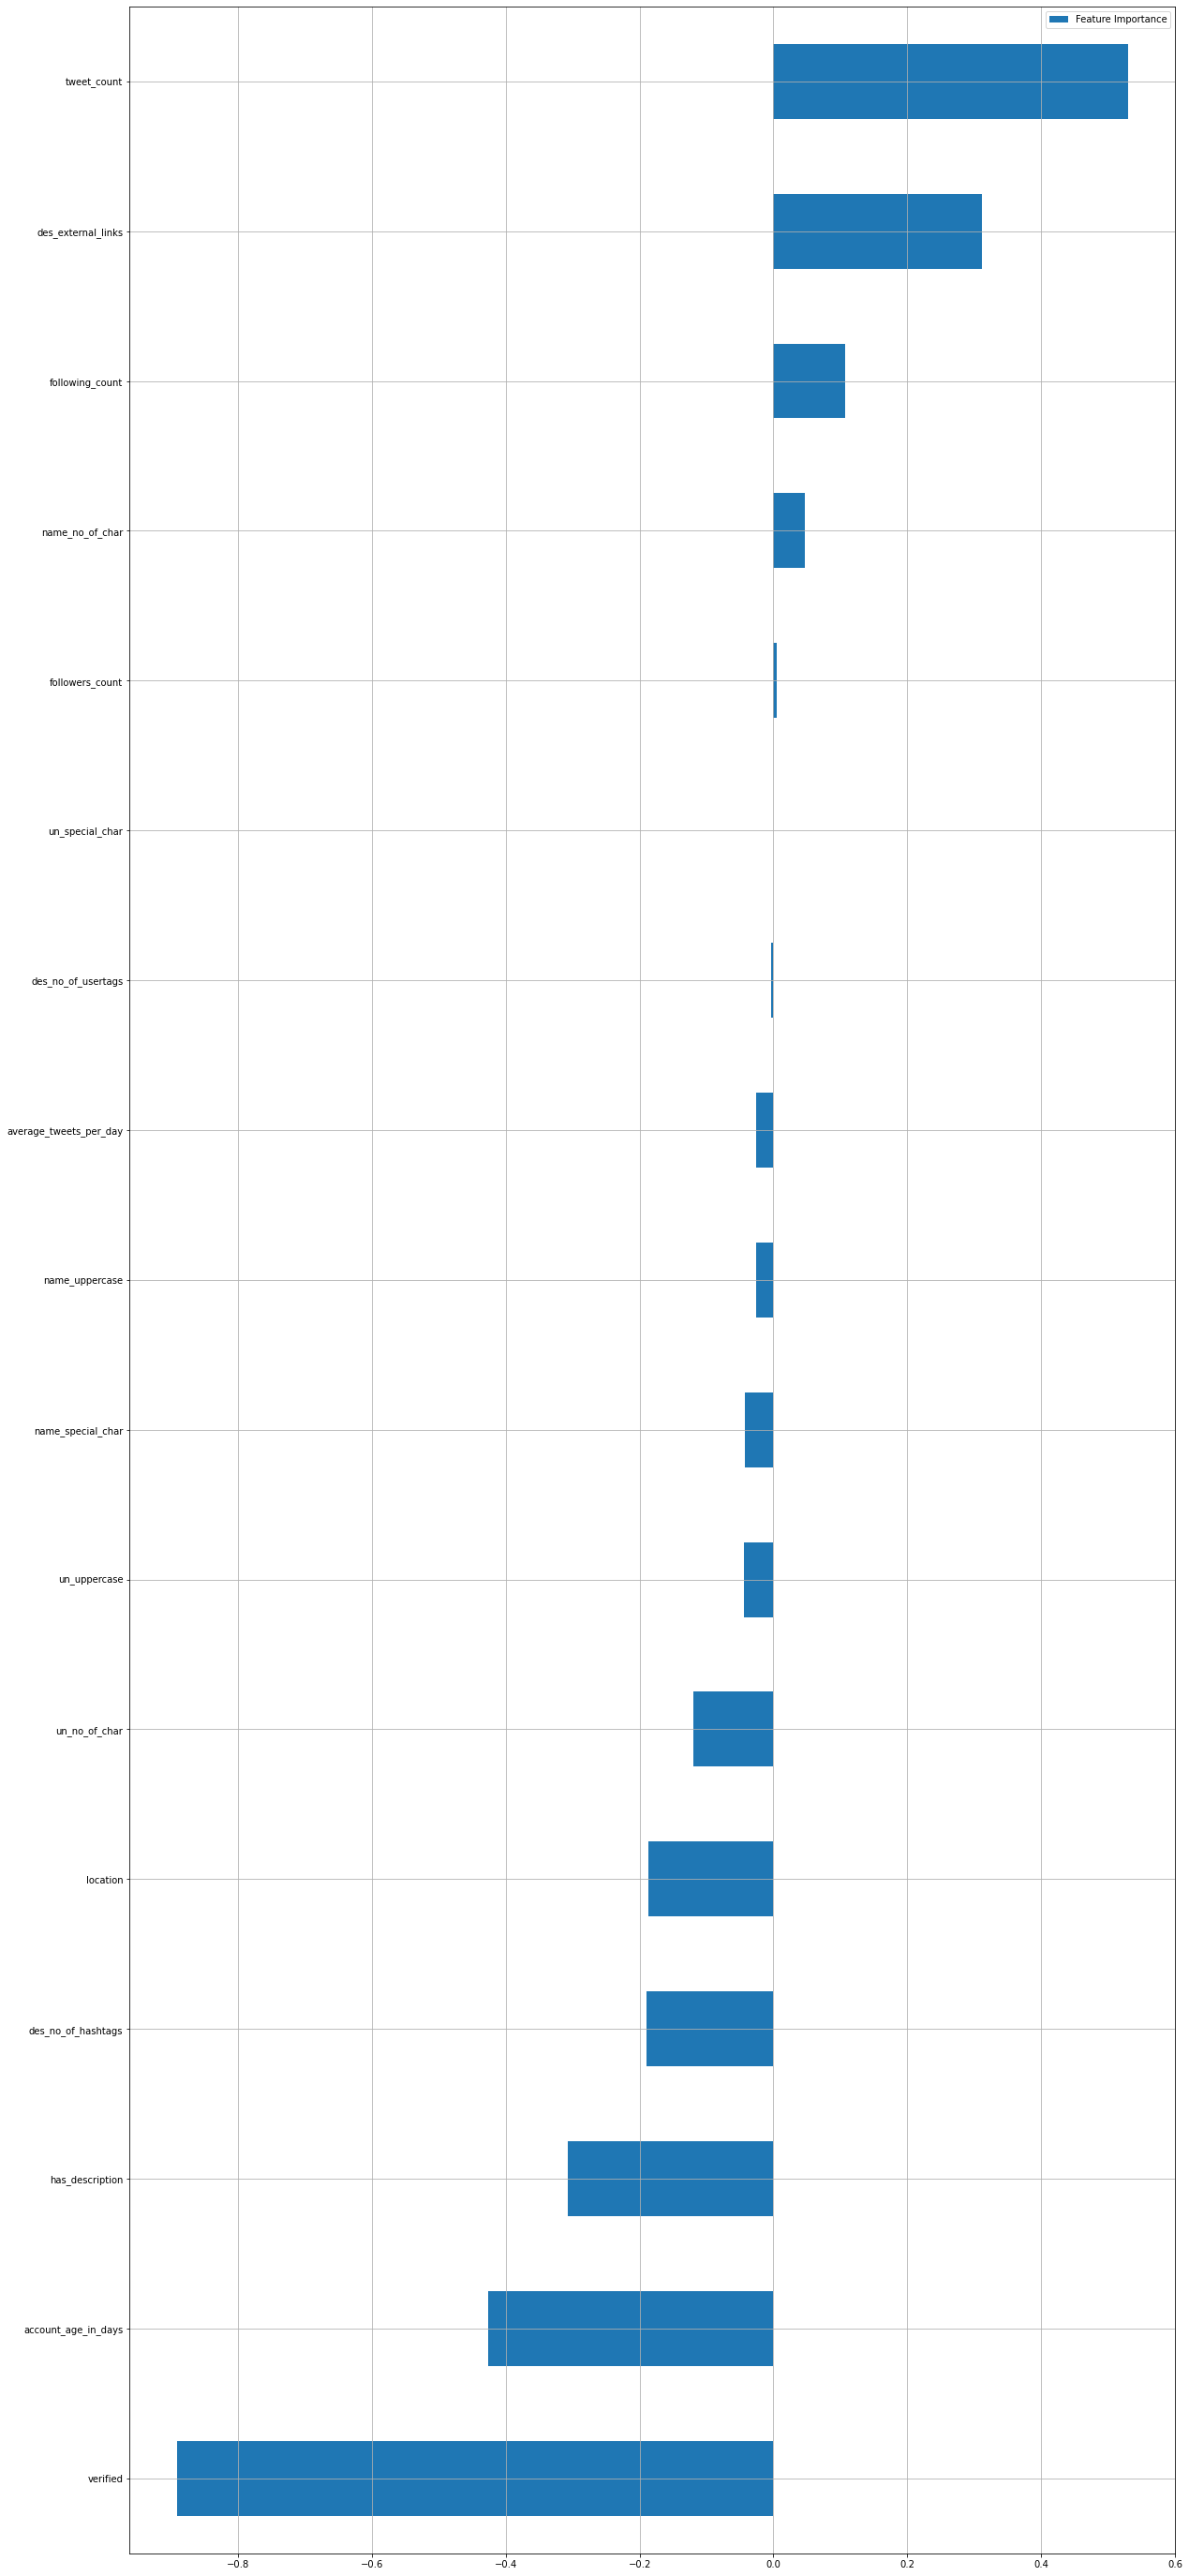

In [147]:
# Feature importance
feature_chart(feature, "Logistic Regression")

#### Prediction Plots

In [148]:
# Plotting parameters
# prediction_chart("Logistic Regression", y_test, y_pred)

In [149]:
# Assigning buckets 
upper = np.arange(1.05, 1.55, 0.05).tolist()
lower = np.arange(0.95, 0.45, -0.05).tolist()
buckets = []
for i in range(len(upper)):
    buckets.append((round(lower[i], 2), round(upper[i], 2)))

# Print proportion of values that fall within each error bucket for base model
accuracies = []
for bucket in buckets:
    num = 0
    denom = len(y_test)
    for i in range(denom):
        if (y_test.iloc[i, 0] * bucket[0]) <= y_pred[i] <= (y_test.iloc[i, 0] * bucket[1]):
            num += 1
    accuracy = (num/(denom)) * 100
    accuracies.append(round(accuracy, 2))

In [152]:
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [150]:
# Print caculated proportions for base model
print(f"Logistic Regression: {accuracies}")

Logistic Regression: [79.62, 79.62, 79.62, 79.62, 79.62, 79.62, 79.62, 79.62, 79.62, 79.62]


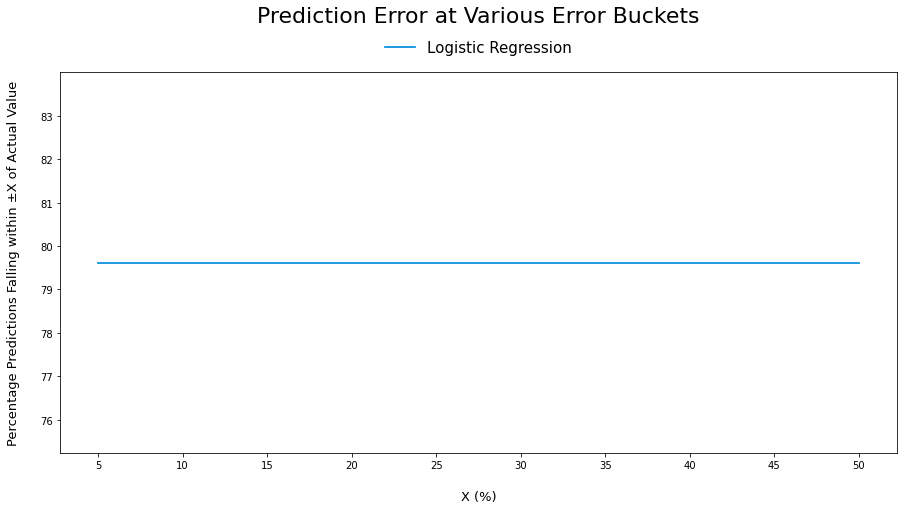

In [151]:
# Plot error bucket performance for model
error_chart("Logistic Regression", accuracies)